In [24]:
import tensorflow as tf

scalar = tf.constant(1.0)
print(scalar)
scalar = tf.constant([1.0])
print(scalar)

scalar = tf.constant([1.0,2.0,3.0])
print(scalar)

scalar = tf.constant([[1.0],[2.0]])
print(scalar)

scalar = tf.constant([[1.0, 2.0]])
print(scalar)

a = tf.constant([1,2,3])
b = tf.constant([4,5,6])

#改一下axis试试
c = tf.stack([a, b], axis=0)
print("bc:",b,c)

d = tf.constant([[1,2],[3,4]])
e = tf.constant([[5,6],[7,8]])

#改一下axis试试
f = tf.stack([d, e])
print("ef",e,f)
with tf.Session() as sess:
    print(sess.run(f))

Tensor("Const_129:0", shape=(), dtype=float32)
Tensor("Const_130:0", shape=(1,), dtype=float32)
Tensor("Const_131:0", shape=(3,), dtype=float32)
Tensor("Const_132:0", shape=(2, 1), dtype=float32)
Tensor("Const_133:0", shape=(1, 2), dtype=float32)
bc: Tensor("Const_135:0", shape=(3,), dtype=int32) Tensor("stack_16:0", shape=(2, 3), dtype=int32)
ef Tensor("Const_137:0", shape=(2, 2), dtype=int32) Tensor("stack_17:0", shape=(2, 2, 2), dtype=int32)
[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]


##  匿名函数lambda的用法

Python中，lambda函数也叫匿名函数，及即没有具体名称的函数，它允许快速定义单行函数，类似于C语言的宏，可以用在任何需要函数的地方。这区别于def定义的函数。    
lambda与def的区别：    
1. def创建的方法是有名称的，而lambda没有。    
1. lambda会返回一个函数对象，但这个对象不会赋给一个标识符，而def则会把函数对象赋值给一个变量（函数名）。    
1. lambda只是一个表达式，而def则是一个语句。    
1. lambda表达式” : “后面，只能有一个表达式，def则可以有多个。    
1. 像if或for或print等语句不能用于lambda中，def可以。    
1. lambda一般用来定义简单的函数，而def可以定义复杂的函数。    
1. lambda函数不能共享给别的程序调用，def可以。 

lambda语法格式：    
lambda 变量 : 要执行的语句    

In [8]:
list_a = [lambda a: a**3, lambda b: b**4]
g=list_a[0]
print("list_a:",g(2))
g=list_a[1]
print("list_a:",g(2))


list_a: 8
list_a: 16


# 画画直线

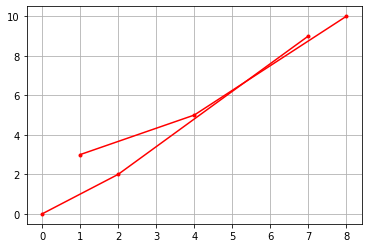

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([[0,1],[2,4],[7,8]])
y = np.array([[0,3],[2,5],[9,10]])


plt.plot(x, y,
         color='red',  # 全部点设置为红色
         marker='.',  # 点的形状为圆点
         linestyle='-')  # 线型为空，也即点与点之间不用线连接

plt.grid(True)
plt.show()

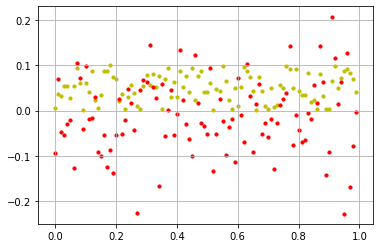

In [15]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0,1,0.01)

# 参数为dimention，值在0-1之间
y = np.random.rand(100)*0.1


y2 = np.random.normal(0,0.1,(100))

plt.scatter(x, y, color='y',s=10)
plt.scatter(x, y2, color='r',s=10)
    
plt.grid(True)
plt.show()

# 3D sin函数 

x1.shape: (32,)
x2.shape: (32,)
x.shape: (32, 32)
y,shape: (32, 32)
r.shape: (32, 32)
z.shape: (32, 32)


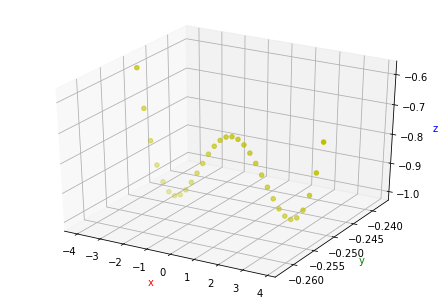

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 绘制散点图
x1 = np.arange(-4, 4, 0.25)
x2 = np.arange(-4, 4, 0.25)
print("x1.shape:",x1.shape)
print("x2.shape:",x2.shape)

x, y = np.meshgrid(x1, x2)

print("x.shape:",x.shape)
print("y,shape:",y.shape)

# 3D 显示时，有用
r = np.sqrt(x ** 2 + y ** 2)

z = np.sin(r)

print("r.shape:",r.shape)
print("z.shape:",z.shape)


fig = plt.figure()
ax = Axes3D(fig)

#ax.scatter(x, y, z,color='b')
#ax.scatter(x, y,color='r')
ax.scatter(x[0], y[15], z[0], color='y')


ax.set_xlabel('x', fontdict={'size': 10, 'color': 'red'})
ax.set_ylabel('y', fontdict={'size': 10, 'color': 'green'})
ax.set_zlabel('z', fontdict={'size': 10, 'color': 'blue'})

plt.show()

# 高斯扰动
* 在sin(x)上增加一个服从高斯分布的扰动！
* 通过summary将日志写入文件，可以通过tensorboard进行展示

(200,)
(200,)
(200,)
(200,)


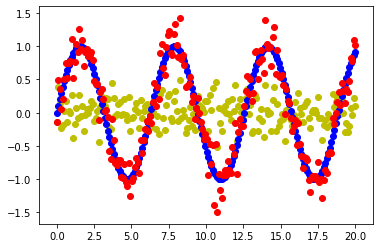

In [19]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


#fig = plt.figure()
#ax = fig.gca(projection='3d')

config = tf.ConfigProto(allow_soft_placement=True)

y=tf.random_normal([200], mean=0, stddev=0.2) #尝试改变stddev，点会分散的越开
with tf.Session(config=config) as sess:
    result = sess.run(y)
    print(result.shape)

writer = tf.summary.FileWriter('.')
writer.add_graph(tf.get_default_graph())

x = np.linspace(0,20,200) #x坐标
y = result
s = np.sin(x) 
z = np.sin(x) + y

print(x.shape)
print(y.shape)
print(z.shape)

plt.scatter(x,y,color='y') #黄色是扰动的分布
plt.scatter(x,s,color='b') #蓝色是未加扰动的sin函数
plt.scatter(x,z,color='r') #红色是叠加到sin上的效果
plt.show()

x_data.shape: (2, 10)
x_data.itemsize: 4
c: [0.         1.57079633 3.14159265]
(10,)
(10,)
(1, 10)
===


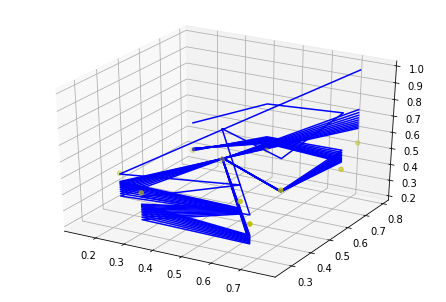

In [297]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy import pi


fig = plt.figure()
ax = Axes3D(fig)


# 使用 NumPy 生成假数据(phony data), 总共 100 个点.
x_data = np.float32(np.random.rand(2, 10)) # 随机输入
print("x_data.shape:",x_data.shape)
print("x_data.itemsize:",x_data.itemsize)
#print(x_data)
y_data = np.dot([0.100, 0.200], x_data) + 0.300
# 0.300在这里做了广播，0.3-->[0.3..100个..0.3]
#print(y_data)

#生产0-pi之间的3个
c = np.linspace(0,pi,3)
print("c:",c)



# 构造一个线性模型
b = tf.Variable(tf.zeros([1]))
W = tf.Variable(tf.random_uniform([1, 2], -1.0, 1.0),name="w")
y = tf.matmul(W, x_data) + b



print(x_data[0].shape)
print(x_data[1].shape)
print(y.shape)
ax.scatter(x_data[0],x_data[1],y_data,color='y')

print("===")
#plt.scatter(x_data[0],x_data[1])
#ax.scatter(x_data[0],x_data[1],y)
#ax.scatter(x_data[0],x_data[1],y)
# 最小化方差
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.1)
train = optimizer.minimize(loss)

# 初始化变量
init = tf.initialize_all_variables()

# 启动图 (graph)
sess = tf.Session()
sess.run(init)

# 拟合平面
for step in range(0, 201):
    _,loss_value = sess.run([train,loss])
    #print("loss_value:",loss_value)
    if step % 20 == 0:
        #print (step, sess.run(loss),sess.run(W), sess.run(b),sess.run(y))
        z = sess.run(y)
        #print(z.shape)
        ax.plot_wireframe(x_data[0],x_data[1],z,color='b',rstride=100, cstride=100)
        writer = tf.summary.FileWriter('.')
        writer.add_graph(tf.get_default_graph())


plt.show()

# 2020-01-04 
## TODO
1. np.random.rand
2. GradientDescentOptimizer
3. sess.run

(2, 200)


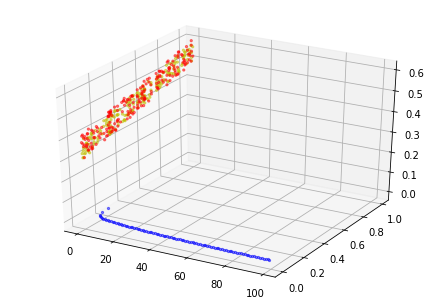

In [306]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = Axes3D(fig)
#ax = fig.gca(projection='3d')

# 使用 NumPy 生成假数据(phony data), 总共 100 个点.
x_data = np.float32(np.random.rand(2,200)) # 随机输入
print(x_data.shape)
#print(x_data)
y_data = np.dot([0.100, 0.200], x_data) + 0.300

ax.scatter(x_data[0],x_data[1],y_data, color='y',alpha=0.5,marker='.',)

# 构造一个线性模型
# 
b = tf.Variable(tf.ones([1]))
W = tf.Variable(tf.random_uniform([1, 2], -1.0, 1.0),name="w")
y = tf.matmul(W, x_data) + b

# 最小化方差
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.1)
train = optimizer.minimize(loss)

# 初始化变量
init = tf.initialize_all_variables()

# 启动图 (graph)
sess = tf.Session()
sess.run(init)

# 随着训练次数的增加，z的值越来约接近y_data，在图书表现为红点与黄色点越来约近
# 增加step，红黄点越近，说明误差越小
# GradientDescentOptimizer这个也有影响
for step in range(0, 100): 
    sess.run(train)
    l=sess.run(loss)
    ax.scatter([step],[l],color='b',alpha=0.5,marker='.')
    #print("loss:",l)
    
z=sess.run(y)
ax.scatter(x_data[0],x_data[1],z,color='r',alpha=0.5,marker='.', cmap=cm.coolwarm)
plt.show()
%matplotlib inline


[-4.   -3.75 -3.5  -3.25 -3.   -2.75 -2.5  -2.25 -2.   -1.75 -1.5  -1.25
 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75  1.    1.25  1.5   1.75
  2.    2.25  2.5   2.75  3.    3.25  3.5   3.75]

[[-4.   -3.75 -3.5  ...  3.25  3.5   3.75]
 [-4.   -3.75 -3.5  ...  3.25  3.5   3.75]
 [-4.   -3.75 -3.5  ...  3.25  3.5   3.75]
 ...
 [-4.   -3.75 -3.5  ...  3.25  3.5   3.75]
 [-4.   -3.75 -3.5  ...  3.25  3.5   3.75]
 [-4.   -3.75 -3.5  ...  3.25  3.5   3.75]]
(32, 32)


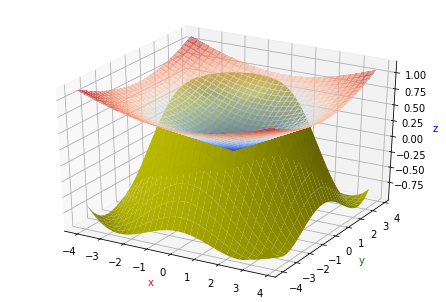

In [159]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
# 绘制散点图
x1 = np.arange(-4, 4, 0.25)
x2 = np.arange(-4, 4, 0.25)
x, y = np.meshgrid(x1, x2)
print(x1)
print("")
print(x)
r = np.sqrt(x ** 2 + y ** 2)
z = np.sin(r)

fig = plt.figure()
ax = Axes3D(fig)
#ax.scatter(x, y, r/5,alpha=0.1,marker='.',color='b')
ax.plot_surface(x, y, z,alpha=1,color='y')
print(r.shape)
ax.plot_surface(x, y, r/5,alpha=0.5,cmap=cm.coolwarm,linewidth=0, antialiased=False)

# 添加坐标轴(顺序是x, y, z)
ax.set_xlabel('x', fontdict={'size': 10, 'color': 'red'})
ax.set_ylabel('y', fontdict={'size': 10, 'color': 'green'})
ax.set_zlabel('z', fontdict={'size': 10, 'color': 'blue'})

plt.show()

(40, 40) (40, 40) (40, 40)


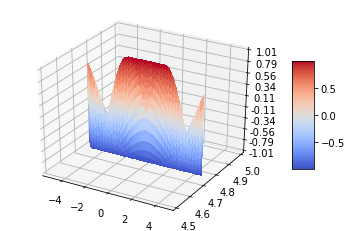

In [477]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

print(X.shape,Y.shape,Z.shape)

# Plot the surface.
surf = ax.plot_surface(X[39], Y[39], Z, cmap=cm.coolwarm,linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [553]:
import tensorflow as tf
config = tf.ConfigProto(allow_soft_placement=True)

matrix1 = tf.constant([[3., 3.],[4.,4.]])
matrix2 = tf.constant([[2.,5.],[5.,2.]])
product = tf.matmul(matrix1, matrix2)


with tf.Session(config=config) as sess:
   result = sess.run(product)
   print(product)
   print(tf.expand_dims(product,0))
   print(tf.expand_dims(product,1))
   print(tf.expand_dims(product,2))
   print(result)
   print(tf.convert_to_tensor(result))

Tensor("MatMul_242:0", shape=(2, 2), dtype=float32)
Tensor("ExpandDims:0", shape=(1, 2, 2), dtype=float32)
Tensor("ExpandDims_1:0", shape=(2, 1, 2), dtype=float32)
Tensor("ExpandDims_2:0", shape=(2, 2, 1), dtype=float32)
[[21. 21.]
 [28. 28.]]
Tensor("Const_209:0", shape=(2, 2), dtype=float32)


[0.5206168  0.33450624 0.46183681 0.44267275 0.4347953  0.44193555
 0.43409454 0.45118985 0.45935269 0.53382254 0.4363565  0.44883519
 0.57401015 0.50940697 0.44145275 0.4539245  0.40125525 0.40224346
 0.56572531 0.46943185 0.50941806 0.32551803 0.37686665 0.38886387
 0.3751613  0.41695681 0.51918452 0.37023036 0.52588705 0.43128037
 0.54789693 0.50983663 0.57111059 0.48766704 0.49840246 0.41233277
 0.49312562 0.52774796 0.36141076 0.4487843  0.46865198 0.43017168
 0.52044074 0.5199819  0.39494941 0.41975197 0.54997258 0.52588199
 0.40016366 0.51948732 0.45121412 0.53992128 0.30495615 0.38650651
 0.46037031 0.52132084 0.53781268 0.49268923 0.47961137 0.36986166
 0.44949986 0.46553801 0.45342283 0.51917275 0.44677872 0.56721232
 0.52111226 0.32834603 0.38984085 0.40986528 0.4184712  0.52886614
 0.31672992 0.4734807  0.50177895 0.42002551 0.39389756 0.40097209
 0.53123775 0.43965876 0.43091685 0.34101731 0.53785942 0.54636938
 0.34520933 0.57943031 0.38094133 0.4597194  0.41038479 0.5445

ValueError: Argument Z must be 2-dimensional.

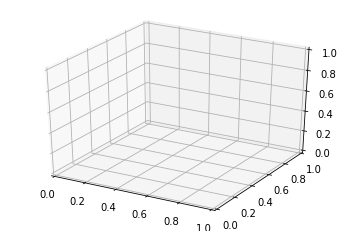

In [20]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

fig = plt.figure()
#ax = Axes3D(fig)
ax = fig.gca(projection='3d')

x_data = np.float32(np.random.rand(2,100))
y_data = np.dot([0.100, 0.200], x_data) + 0.300
print(y_data)
ax.plot_surface(x_data[0], x_data[1], np.array(y_data*2),color='r')

B = tf.Variable(tf.zeros([1]))
W = tf.Variable(tf.random_uniform([1, 2], -1.0, 1.0))
Y = tf.matmul(W, x_data) + B

# 最小化方差
loss = tf.reduce_mean(tf.square(Y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.05)
train = optimizer.minimize(loss)

init = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init)

tf.summary.scalar("loss",loss)
merged_summary_op = tf.summary.merge_all()
summary_writer = tf.summary.FileWriter('/tmp/leo_logs', sess.graph)
    
total_step=0
while total_step <10:
    print("Leo",total_step)
    total_step = total_step + 1 
    sess.run(train)
    if total_step % 1 == 0:
      summary_str = sess.run(merged_summary_op)
      summary_writer.add_summary(summary_str, total_step)

print("over")
sess.run(train)
Z = sess.run(Y)
print('z.shape:',Z.shape)
ax.plot_surface(x_data, x_data, Z,alpha=0.3, color='r')
plt.show()


Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
0.9224


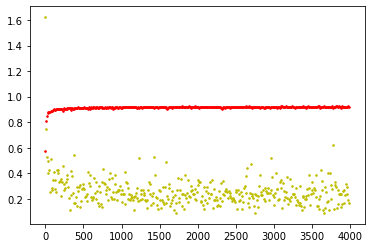

In [221]:
# from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

# Import data
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import matplotlib.pyplot as plt

mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)


# 建立抽象模型
x = tf.placeholder(tf.float32, [None, 784]) # 占位符
y = tf.placeholder(tf.float32, [None, 10])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
a = tf.nn.softmax(tf.matmul(x, W) + b)

# 定义损失函数和训练方法
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y * tf.log(a), reduction_indices=[1]))  # 损失函数为交叉熵
optimizer = tf.train.GradientDescentOptimizer(0.5) # 梯度下降法，学习速率为0.5
train = optimizer.minimize(cross_entropy) # 训练目标：最小化损失函数

# Test trained model
correct_prediction = tf.equal(tf.argmax(a, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Train
sess = tf.InteractiveSession()      # 建立交互式会话
tf.initialize_all_variables().run()

for i in range(4000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    train.run({x: batch_xs, y: batch_ys})
    #sess.run(feed_dict={x: batch_xs, y: batch_ys}) 这样怎么写 
    if i%10==0:
        _,c = sess.run([train,cross_entropy], feed_dict={x: batch_xs, y: batch_ys})
        ac = sess.run(accuracy,feed_dict={x:mnist.test.images,y:mnist.test.labels})
        #print("c:",c)
        plt.scatter(i,c,color='y',s=10,marker='.')
        plt.scatter(i,ac,color='r',s=10,marker='.')
        
print(sess.run(accuracy,feed_dict={x:mnist.test.images,y:mnist.test.labels}))
plt.show()
sess.close()

# 计算sin()的梯度
1. sin函数    
1. sin函数的gradients    
1. ax.scatter参数alpha，marker    

Tensor("Placeholder_171:0", dtype=float32)


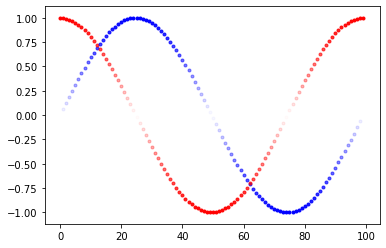

In [296]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from numpy import pi

config = tf.ConfigProto(allow_soft_placement=True)

xdata = np.linspace(0,2*pi, 100)
x = tf.placeholder(tf.float32)
print(x)
s = tf.sin(x, name="sin")
y = tf.gradients(s,x)

with tf.Session(config=config) as sess:
    for i in range(0,len(xdata)):
        ry,rx,rs = sess.run([y,x,s],feed_dict={x: xdata[i]}) 
        plt.scatter(i,rs,color='b',marker='.',alpha=abs(rs))       #sin函数
        plt.scatter(i,ry[0],color='r',marker='.',alpha=abs(ry[0])) #gradients
        
plt.show()

# a的n次方大于n的a次方 a>1

const Tensor("Fill_79:0", shape=(1,), dtype=int32)
Tensor("Placeholder_251:0", dtype=int32)


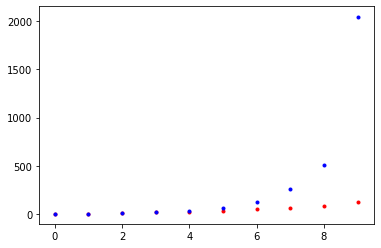

In [442]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from numpy import pi

config = tf.ConfigProto(allow_soft_placement=True)

const=tf.fill([1], 2)
print("const", const)
xdata = np.linspace(1,11, 10,tf.int32)
x = tf.placeholder(tf.int32)

print(x)
p = tf.pow(x, const) 
q = tf.pow(const, x)

with tf.Session(config=config) as sess:
    for i in range(0,len(xdata)):
        ry,an = sess.run([p,q],feed_dict={x: xdata[i]}) 
        #print(xdata, ry,an)
        plt.scatter(i,ry,color='r',marker='.') 
        plt.scatter(i,an,color='b',marker='.') 
plt.show()

# expand_dims
1. tf.expand_dims(tensor,n) n表示在哪一维增加一个维
1. tf.tile(tensor, [n,n,n]) 赋值倍数


In [435]:
import tensorflow as tf 
import numpy as np
a=tf.constant([[1.,2.],
               [2.,1.],
               [-2., -1]])
b = tf.expand_dims(a,0)
c = tf.expand_dims(a,1)
d = tf.tile(tf.expand_dims(a,1),[1,3,1])
e = tf.tile(a,[3,1])
with tf.Session(config=config) as sess:
    ra,rb,rc,rd,re = sess.run([a,b,c,d,e])
    print(ra.shape)  #下面可以不用np.arry的
    print(np.array(ra,dtype=int).shape,ra,
          "\r\n====\r\n",np.array(rb,dtype=int).shape,rb,
          "\r\n====\r\n",np.array(rc,dtype=int).shape,rc,
          "\r\n====\r\n",np.array(rd,dtype=int).shape,rd,
          "\r\n====\r\n",np.array(re,dtype=int).shape,re)

(3, 2)
(3, 2) [[ 1.  2.]
 [ 2.  1.]
 [-2. -1.]] 
====
 (1, 3, 2) [[[ 1.  2.]
  [ 2.  1.]
  [-2. -1.]]] 
====
 (3, 1, 2) [[[ 1.  2.]]

 [[ 2.  1.]]

 [[-2. -1.]]] 
====
 (3, 3, 2) [[[ 1.  2.]
  [ 1.  2.]
  [ 1.  2.]]

 [[ 2.  1.]
  [ 2.  1.]
  [ 2.  1.]]

 [[-2. -1.]
  [-2. -1.]
  [-2. -1.]]] 
====
 (9, 2) [[ 1.  2.]
 [ 2.  1.]
 [-2. -1.]
 [ 1.  2.]
 [ 2.  1.]
 [-2. -1.]
 [ 1.  2.]
 [ 2.  1.]
 [-2. -1.]]


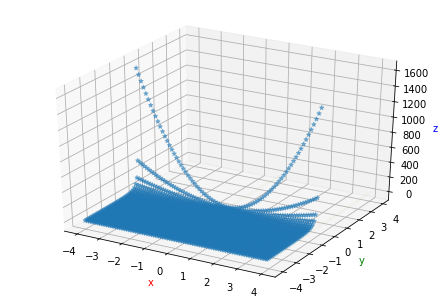

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf

fig = plt.figure()
ax = Axes3D(fig)

# x方除以y方
x1 = np.arange(-4, 4, 0.1)
x2 = np.arange(-4, 0, 0.1)
x, y = np.meshgrid(x1, x2)
r = np.power(y,2) 
s = np.power(x,2)
z = s/r
ax.scatter(x, y, z,alpha=0.5,marker='*')

y0 = np.arange(-4, 4, 0.1)
x0 = np.zeros_like(y0)
r = np.power(y0,2) + 0.0001 *np.power(x0,2)
s = np.power(x0,2)
z = s/r
ax.scatter(x0, y0, z,alpha=0.01,marker='.',color='y')


x0 = np.arange(-4, 4, 0.1)
y0 = np.zeros_like(y0)
r = np.power(x0,2) + 0.1*np.power(y0,2)
s = np.power(x0,2)
z = s/r
ax.scatter(x0, y0, z,alpha=0.01,marker='.',color='r')

y4 = np.arange(-4, 4, 0.1)
x4 = np.ones_like(y4)*4
r4 = np.power(y4,2) +  np.power(x4,2)
s4 = np.power(x4,2)
z4 = s4/r4
ax.scatter(x4, y4, z4,alpha=0.01,marker='.',color='y')

# 添加坐标轴(顺序是x, y, z)
ax.set_xlabel('x', fontdict={'size': 10, 'color': 'red'})
ax.set_ylabel('y', fontdict={'size': 10, 'color': 'green'})
ax.set_zlabel('z', fontdict={'size': 10, 'color': 'blue'})

plt.show()

z1: [0.05882353 0.06169031 0.06476684 0.06807352 0.07163324 0.0754717
 0.07961783 0.08410429 0.08896797 0.09425071 0.1        0.10626993
 0.11312217 0.12062726 0.12886598 0.13793103 0.14792899 0.15898251
 0.17123288 0.18484288 0.2        0.21691974 0.23584906 0.25706941
 0.28089888 0.30769231 0.33783784 0.37174721 0.40983607 0.45248869
 0.5        0.55248619 0.6097561  0.67114094 0.73529412 0.8
 0.86206897 0.91743119 0.96153846 0.99009901 1.         0.99009901
 0.96153846 0.91743119 0.86206897 0.8        0.73529412 0.67114094
 0.6097561  0.55248619 0.5        0.45248869 0.40983607 0.37174721
 0.33783784 0.30769231 0.28089888 0.25706941 0.23584906 0.21691974
 0.2        0.18484288 0.17123288 0.15898251 0.14792899 0.13793103
 0.12886598 0.12062726 0.11312217 0.10626993 0.1        0.09425071
 0.08896797 0.08410429 0.07961783 0.0754717  0.07163324 0.06807352
 0.06476684 0.06169031]


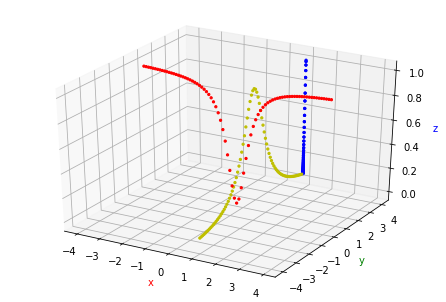

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf

fig = plt.figure()
ax = Axes3D(fig)

y1 = np.arange(-4, 4, 0.1)
x1 = np.ones_like(y1)
r1 = np.power(y1,2) + np.power(x1,2)
s1 = np.power(x1,2)
z1 = s1/r1
print("z1:",z1)
y0 = np.ones_like(y1)*4


ax.scatter(x1, y0, z1,alpha=1,marker='.',color='b')

ax.scatter(x1, y1, z1,alpha=1,marker='.',color='y')

x2 = np.arange(-4, 4, 0.1)
y2 = np.ones_like(x2)*(0.5)
r2 = np.power(y2,2) +  np.power(x2,2)
s2 = np.power(x2,2)
z2 = s2/r2

ax.scatter(x2, y2, z2,alpha=1,marker='.',color='r')

# 添加坐标轴(顺序是x, y, z)
ax.set_xlabel('x', fontdict={'size': 10, 'color': 'red'})
ax.set_ylabel('y', fontdict={'size': 10, 'color': 'green'})
ax.set_zlabel('z', fontdict={'size': 10, 'color': 'blue'})

plt.show()

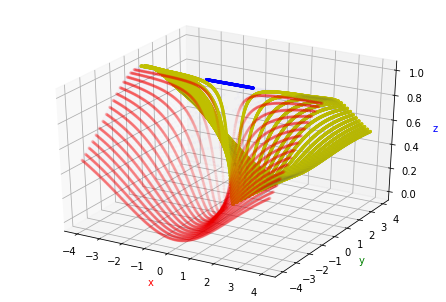

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf

fig = plt.figure()
ax = Axes3D(fig)

for i in np.arange(-4, 4,0.1):
    y1 = np.arange(-4, 4, 0.1)
    x1 = np.ones_like(y1)*i
    r1 = np.power(y1,2) +   np.power(x1,2)
    s1 = np.power(x1,2)
    z1 = s1/r1
    ax.scatter(x1, y1, z1,alpha=0.01,marker='.',color='b')
    

#固定y，x趋向0，z趋向0
for i in np.arange(-4,0,0.25):
    x5 = np.arange(-4, 4, 0.01)
    y5 = np.ones_like(x5)*i
    r5 = np.power(y5,2) +  np.power(x5,2)
    s5 = np.power(x5,2)
    z5 = s5/r5
    ax.scatter(x5, y5, z5,alpha=0.05,marker='.',color='r')

for i in np.arange(0,4,0.25):
    if i ==0:
        x5 = np.arange(-1, 1, 0.01)
    else: 
        x5 = np.arange(-4,4,0.01)
    y5 = np.ones_like(x5)*i
    r5 = np.power(y5,2) +   np.power(x5,2)
    s5 = np.power(x5,2)
    z5 = s5/r5
    if i==0:
        # y==0时，x [-1,1], z5 始终为1
        ax.scatter(x5, y5, z5,alpha=1,marker='.',color='b')
    else:
        # y!=0，x在0点附近，看到z趋近于0
        ax.scatter(x5, y5, z5,alpha=1,marker='.',color='y')

# 添加坐标轴(顺序是x, y, z)
ax.set_xlabel('x', fontdict={'size': 10, 'color': 'red'})
ax.set_ylabel('y', fontdict={'size': 10, 'color': 'green'})
ax.set_zlabel('z', fontdict={'size': 10, 'color': 'blue'})

plt.show()

(800,)


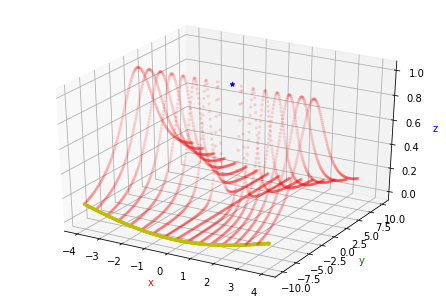

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf

fig = plt.figure()
ax = Axes3D(fig)

for i in np.arange(-4, 4,0.5):
    y1 = np.arange(-10, 10, 0.1)
    x1 = np.ones_like(y1)*i
    r1 = np.power(y1,2) +   np.power(x1,2)
    s1 = np.power(x1,2)
    z1 = s1/r1
    ax.scatter(x1, y1, z1,alpha=0.1,marker='.',color='r')



#for i in np.arange(-1, 1,0.1):
x1 = np.arange(-4, 4, 0.01)
y1 = np.ones_like(x1)*(-10)
print(x1.shape)
r1 = np.power(y1,2) +   np.power(x1,2)
s1 = np.power(x1,2)
z1 = s1/r1
ax.scatter(x1, y1, z1,alpha=0.5,marker='.',color='y')

#y 固定为0，x-->0时，zp趋向于1；
yp = [0]
xp = [0.1]
rp = np.power(yp,2) +   np.power(xp,2)
sp = np.power(xp,2)
zp = sp/rp
ax.scatter(xp, yp, zp,alpha=1,marker='*',color='b')


# 添加坐标轴(顺序是x, y, z)
ax.set_xlabel('x', fontdict={'size': 10, 'color': 'red'})
ax.set_ylabel('y', fontdict={'size': 10, 'color': 'green'})
ax.set_zlabel('z', fontdict={'size': 10, 'color': 'blue'})

plt.show()

(800,)
(800,)
(800,)
(800,)
(800,)


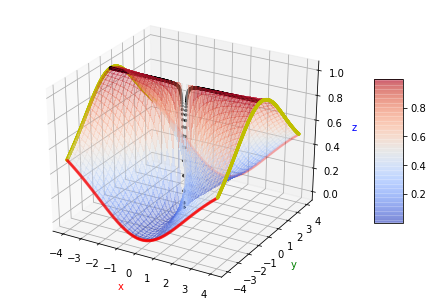

In [220]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure()
ax = Axes3D(fig)

#for i in np.arange(-4, 4, 0.1):
y1 = np.arange(-4, 4, 0.1)
x1 = np.arange(-4, 4, 0.1)
x, y = np.meshgrid(x1, y1)

r1 = np.power(y,2) + np.power(x,2)
s1 = np.power(x,2)
z1 = s1/r1

#ax.plot_surface(x1, y1, np.expand_dims(z1,1),alpha=1,cmap=cm.coolwarm,linewidth=0.1, antialiased=False)
surf=ax.plot_surface(x, y, z1,alpha=0.3,cmap=cm.coolwarm,linewidth=0, antialiased=False)
    #ax.scatter(x1, y1, z1,alpha=1,marker='*',color='b')
    
fig.colorbar(surf, shrink=0.5, aspect=5)

#外面红色边框
x1 = np.arange(-4, 4, 0.01)
y1 = np.ones_like(x1)*(-4)
print(x1.shape)
r1 = np.power(y1,2) +   np.power(x1,2)
s1 = np.power(x1,2)
z1 = s1/r1
ax.scatter(x1, y1, z1,alpha=0.1,marker='.',color='r')

#里面红色边框
x1 = np.arange(-4, 4, 0.01)
y1 = np.ones_like(x1)*(4)
print(x1.shape)
r1 = np.power(y1,2) +   np.power(x1,2)
s1 = np.power(x1,2)
z1 = s1/r1
ax.scatter(x1, y1, z1,alpha=0.02,marker='.',color='r')

#中间黑色
x1 = np.arange(-4, 4, 0.01)
y1 = np.ones_like(x1)*(-0.05)
print(x1.shape)
r1 = np.power(y1,2) +   np.power(x1,2)
s1 = np.power(x1,2)
z1 = s1/r1
ax.scatter(x1, y1, z1,alpha=1,marker='.',color='black')

#右边框
yy = np.arange(-4, 4, 0.01)
xx = np.ones_like(yy)*4
print(xx.shape)
r1 = np.power(yy,2) +   np.power(xx,2)
s1 = np.power(xx,2)
z1 = s1/r1
ax.scatter(xx, yy, z1,alpha=1,marker='.',color='y')

#左边框
yy = np.arange(-4, 4, 0.01)
xx = np.ones_like(yy)*(-4)
print(xx.shape)
r1 = np.power(yy,2) +   np.power(xx,2)
s1 = np.power(xx,2)
z1 = s1/r1
ax.scatter(xx, yy, z1,alpha=1,marker='.',color='y')

ax.set_xlabel('x', fontdict={'size': 10, 'color': 'red'})
ax.set_ylabel('y', fontdict={'size': 10, 'color': 'green'})
ax.set_zlabel('z', fontdict={'size': 10, 'color': 'blue'})
plt.show()


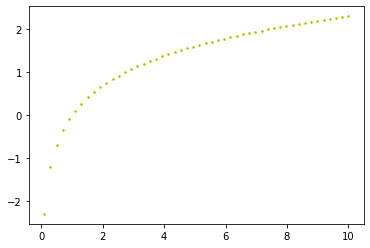

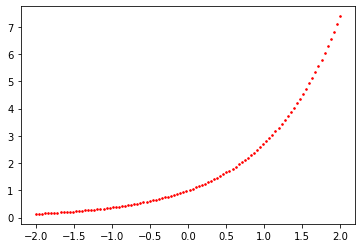

In [33]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

x_l = np.linspace(-10,10,100)
x_e = np.linspace(-2,2,100)
x   = tf.placeholder(tf.float32)
xe   = tf.placeholder(tf.float32)
y   = tf.log(x)
y_e = tf.exp(xe)

with tf.Session() as sess:
    r_y,r_ye = sess.run([y,y_e],feed_dict={x: x_l,xe: x_e})
   

plt.scatter(x_l, r_y, color='y',s=10,marker='.')   
plt.show()
plt.scatter(x_e, r_ye, color='r',s=10,marker='.')
plt.show()

[[7.07106781 6.40312424 5.83095189 5.38516481 5.09901951 5.
  5.09901951 5.38516481 5.83095189 6.40312424]
 [6.40312424 5.65685425 5.         4.47213595 4.12310563 4.
  4.12310563 4.47213595 5.         5.65685425]
 [5.83095189 5.         4.24264069 3.60555128 3.16227766 3.
  3.16227766 3.60555128 4.24264069 5.        ]
 [5.38516481 4.47213595 3.60555128 2.82842712 2.23606798 2.
  2.23606798 2.82842712 3.60555128 4.47213595]
 [5.09901951 4.12310563 3.16227766 2.23606798 1.41421356 1.
  1.41421356 2.23606798 3.16227766 4.12310563]
 [5.         4.         3.         2.         1.         0.
  1.         2.         3.         4.        ]
 [5.09901951 4.12310563 3.16227766 2.23606798 1.41421356 1.
  1.41421356 2.23606798 3.16227766 4.12310563]
 [5.38516481 4.47213595 3.60555128 2.82842712 2.23606798 2.
  2.23606798 2.82842712 3.60555128 4.47213595]
 [5.83095189 5.         4.24264069 3.60555128 3.16227766 3.
  3.16227766 3.60555128 4.24264069 5.        ]
 [6.40312424 5.65685425 5.         4.

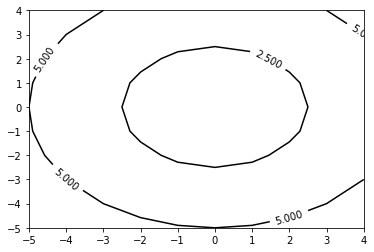

In [21]:
## import matplotlib.pyplot as plt
import numpy as np

# Make data.
x = np.arange(-5, 5, 1)
y = np.arange(-5, 5, 1)
X, Y = np.meshgrid(x, y)
Z    = np.sqrt(X**2 + Y**2)
print(Z)
C = plt.contour(X, Y,Z, 2, colors='black')
plt.clabel(C, inline=True, fontsize=10)
print(X.shape,Y.shape, Z.shape)


plt.show()